In [2]:
# Not show the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the required libraries
import mpld3
import gzip
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium as fl
import plotly.express as px
import plotly.graph_objs as go

from folium.plugins import HeatMap
from folium.plugins import PolyLineTextPath

In [4]:
# Display all columns
pd.set_option('display.max_columns',200)

# Display all rows
pd.options.display.max_rows = None

## Read the Data

In [5]:
# Read the csv file using 'read_csv'.
df = pd.read_csv("/kaggle/input/gtd/globalterrorismdb_0718dist.csv", encoding='iso-8859-1')

##  Check the structure of the data

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns

In [6]:
# Check the number of rows and columns in the dataframe
df.shape

(181691, 135)

In [7]:
# Check the data of top 5 rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [8]:
# Types of all columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [9]:
# Let's also summarize the features using the df.describe method:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

##  Data Quality check and missing values

### Deal with duplicated data

In [10]:
df.duplicated().sum()

0

### Deal with missing data

In [11]:
# Percentage of null values in each column
null_percentage = df.isnull().sum() * 100 / len(df)

In [12]:
# Top columns have highest percentages of null values
null_percentage.sort_values(ascending = False).head(50)

gsubname3           99.988992
weapsubtype4_txt    99.961473
weapsubtype4        99.961473
weaptype4           99.959822
weaptype4_txt       99.959822
claimmode3          99.926799
claimmode3_txt      99.926799
gsubname2           99.911938
claim3              99.824978
guncertain3         99.823877
gname3              99.821675
divert              99.821675
attacktype3         99.764435
attacktype3_txt     99.764435
ransomnote          99.717102
ransompaidus        99.696187
ransomamtus         99.690133
claimmode2          99.660963
claimmode2_txt      99.660963
ransompaid          99.574002
corp3               99.435305
targsubtype3        99.396228
targsubtype3_txt    99.396228
natlty3_txt         99.368708
natlty3             99.368708
target3             99.353298
targtype3           99.352747
targtype3_txt       99.352747
ransomamt           99.256980
weapsubtype3_txt    99.068198
weapsubtype3        99.068198
weaptype3_txt       98.974633
weaptype3           98.974633
claim2    

In [13]:
# List all of the columns having null values more than ~50% (ie. 45%)
null_columns = null_percentage[null_percentage.values>45].index
null_columns

Index(['approxdate', 'resolution', 'location', 'alternative',
       'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3',
       'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2',
       'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain2',
       'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim',
       'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt',
       'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt',
       'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt',
       'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'nhostkid',
       'nhostkidus', 'nhours', 'ndays', 'divert'

In [14]:
# Remove those columns
df.drop(null_columns, axis=1, inplace=True)

In [15]:
# See the application data after dropping the columns having null values more than 45%
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [16]:
# List of remaining columns which have null values
null_percentage = df.isnull().sum() * 100 / len(df)
null_percentage[null_percentage>0].sort_values(ascending = False)

nperps              39.140629
nperpcap            38.245703
nwoundte            38.055270
weapdetail          37.244553
nkillter            36.852678
scite1              36.430533
summary             36.396409
claimed             36.391456
nwoundus            35.611010
nkillus             35.470111
corp1               23.418882
weapsubtype1        11.430396
weapsubtype1_txt    11.430396
nwound               8.977330
targsubtype1_txt     5.709144
targsubtype1         5.709144
nkill                5.676120
longitude            2.508104
latitude             2.507554
natlty1              0.858050
natlty1_txt          0.858050
target1              0.350045
city                 0.238867
provstate            0.231712
guncertain1          0.209146
ishostkid            0.097969
specificity          0.003302
multiple             0.000550
doubtterr            0.000550
dtype: float64

In [17]:
df.shape

(181691, 58)

In [18]:
# Show all numerical columns
df.describe().columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [19]:
df.doubtterr.value_counts()

 0.0    138905
 1.0     29001
-9.0     13784
Name: doubtterr, dtype: int64

### Deal with uneccessary columns

In [20]:
# count the number of unique values in each column
unique_counts = df.nunique()

# filter the columns based on unique value count
df = df.loc[:, unique_counts > 1]
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [21]:
# Get the number of rows in the DataFrame
num_rows = len(df)

# Get the number of unique values in each column
unique_counts = df.nunique()

# Select the columns where the number of unique values is equal to the number of rows
result = unique_counts[unique_counts == num_rows].index.tolist()

# Print the result
print(result)

['eventid']


In [22]:
df.crit1.value_counts()

1    179607
0      2084
Name: crit1, dtype: int64

In [23]:
df.shape

(181691, 58)

In [24]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [25]:
df = df.drop(['country', 'region', 'latitude', 'longitude', 'attacktype1', 'targtype1', 'targsubtype1', 'natlty1', 'weaptype1', 'weapsubtype1'], axis=1)

## Rename columns

In [26]:
# Rename the columns
new_names = {'country_txt': 'country', 'region_txt': 'region', 'iyear': 'year', 'imonth': 'number_of_months', 'iday': 'number_of_days', 'attacktype1_txt': 'attack_type', 'targtype1_txt': 'target_type', 'targsubtype1_txt': 'target_subtype','target1': 'target', 'natlty1_txt': 'nationality','weaptype1_txt': 'weapon_type'}
df = df.rename(columns=new_names)

##  General Analysis

In [27]:
def cases_group_by_count(df, column_name):

    cases_group_by = df.groupby(column_name)['eventid'].count()
    
    # Create a new DataFrame from the Series object
    cases_group_by_df = pd.DataFrame({column_name: cases_group_by.index, 'Number of Cases': cases_group_by.values})

    # Sort the DataFrame by the Number of Cases column in descending order
    cases_group_by_df = cases_group_by_df.sort_values('Number of Cases', ascending=False)
    
    print(cases_group_by_df.head())
    
    return cases_group_by_df

In [28]:
def cases_group_by_sum(df, col_group_by, value):

    cases_group_by = df.groupby(col_group_by)[value].sum()
    
    # Create a new DataFrame from the Series object
    cases_group_by_df = pd.DataFrame({col_group_by: cases_group_by.index, value: cases_group_by.values})

    # Sort the DataFrame by the Number of Cases column in descending order
    cases_group_by_df = cases_group_by_df.sort_values(value, ascending=False)
    
    print(cases_group_by_df.head())
    
    return cases_group_by_df

In [29]:
def cases_group_by_avg(df, col_group_by, value):

    cases_group_by = df.groupby(col_group_by)[value].mean().round()
    
    # Create a new DataFrame from the Series object
    cases_group_by_df = pd.DataFrame({col_group_by: cases_group_by.index, value: cases_group_by.values})

    # Sort the DataFrame by the Number of Cases column in descending order
    cases_group_by_df = cases_group_by_df.sort_values(value, ascending=False)
    
    print(cases_group_by_df.head())
    
    return cases_group_by_df

In [30]:
def cases_group_by_percentage(df, col_group_by, value):

    cases_group_by = df.groupby(col_group_by)[value].sum() * 100/df.groupby(col_group_by)['eventid'].count()
    
    # Create a new DataFrame from the Series object
    cases_group_by_df = pd.DataFrame({col_group_by: cases_group_by.index, value: cases_group_by.values})

    # Sort the DataFrame by the Number of Cases column in descending order
    cases_group_by_df = cases_group_by_df.sort_values(value, ascending=False)
    
    print(cases_group_by_df.head())
    
    return cases_group_by_df

In [31]:
def plot_bar(df,column):
    
    cases_group_by_count_df = cases_group_by_count(df,column)
    
    # Create a bar trace
    trace = go.Bar(x=cases_group_by_count_df[column], y=cases_group_by_count_df["Number of Cases"])

    # Create the layout
    layout = go.Layout(xaxis=dict(title=column), yaxis=dict(title='Number of Cases'))

    # Create the figure
    fig = go.Figure(data=[trace], layout=layout)

    # Display the figure
    fig.show()
    
    return cases_group_by_count_df

### Number of cases by region

In [32]:
cases_by_region_df = cases_group_by_count(df, "region")

                        region  Number of Cases
5   Middle East & North Africa            50474
8                   South Asia            44974
7                South America            18978
10          Sub-Saharan Africa            17550
11              Western Europe            16639


### Number of cases by countries

In [33]:
cases_by_country_df = cases_group_by_count(df, "country")

         country  Number of Cases
84          Iraq            24636
134     Pakistan            14368
0    Afghanistan            12731
80         India            11960
35      Colombia             8306


In [34]:
# create choropleth map
fig = px.choropleth(cases_by_country_df, 
                    locations='country',
                    locationmode='country names',
                    color='Number of Cases',
                    hover_name='country',
                    projection='natural earth')

fig.show()

In [35]:
df[df['country']=='Iraq'].region.value_counts()

Middle East & North Africa    24636
Name: region, dtype: int64

### Cases with highest people killed

In [36]:
columns = ['year', 'country', 'region', 'city', 'attack_type', 'target_type', 'target_subtype', 'corp1', 'target', 'nationality', 'gname', 'weapon_type', 'weapdetail', 'nkill']

In [37]:
df[columns].sort_values('nkill', ascending=False).head()

,year,country,region,city,attack_type,target_type,target_subtype,corp1,target,nationality,gname,weapon_type,weapdetail,nkill
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,"Military Personnel (soldiers, troops, officers...",Iraqi Armed Forces,Soldiers,Iraq,Islamic State of Iraq and the Levant (ISIL),Firearms,NaN,1570.0
73126,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians,Passengers and crew members on American Airlin...,United States,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,The attackers reportedly gained control of the...,1384.0
73127,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians,Passengers and crew members on United Airlines...,United States,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,The attackers reportedly gained control of the...,1383.0
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Religion Identified,Tutsi Tribe,Group of Tutsi Refugees inside Catholic Church,Rwanda,Hutu extremists,Firearms,Automatic firearm; Machete,1180.0
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Religion Identified,Not Applicable,Yizidi Civilians,Iraq,Islamic State of Iraq and the Levant (ISIL),Unknown,NaN,953.0


In [38]:
print(df[df.nkill == 1570].summary)

133518    06/12/2014: Assailants abducted approximately ...
Name: summary, dtype: object


In [39]:
kill_per_country_df = cases_group_by_sum(df, 'country', 'nkill')
kill_per_country_df.head(10)

         country    nkill
84          Iraq  78589.0
0    Afghanistan  39384.0
134     Pakistan  23822.0
130      Nigeria  22682.0
80         India  19341.0


,country,nkill
84,Iraq,78589.0
0,Afghanistan,39384.0
134,Pakistan,23822.0
130,Nigeria,22682.0
80,India,19341.0
167,Sri Lanka,15530.0
175,Syria,15229.0
35,Colombia,14698.0
139,Peru,12771.0
52,El Salvador,12053.0


## The world Analysis

### # of cases by year

In [40]:
# Total cases
cases_by_year_df = cases_group_by_count(df,"year")

    year  Number of Cases
43  2014            16903
44  2015            14965
45  2016            13587
42  2013            12036
46  2017            10900


In [41]:
# Extended cases (incident extended more than 24 hours)
extended_cases_group_by_df = cases_group_by_sum(df,'year','extended')

    year  extended
43  2014      1100
44  2015      1036
45  2016       951
46  2017       748
42  2013       575


In [42]:
# Success cases
success_cases_group_by_df = cases_group_by_sum(df,'year','success')

    year  success
43  2014    15015
44  2015    12676
45  2016    10975
42  2013    10484
46  2017     8652


In [43]:
# Suicide cases
suicide_cases_group_by_df = cases_group_by_sum(df,'year','suicide')

    year  suicide
45  2016      985
44  2015      922
46  2017      844
43  2014      744
42  2013      622


In [44]:
cases_by_year_df = pd.merge(cases_by_year_df, extended_cases_group_by_df, on = 'year', how='left').merge(success_cases_group_by_df, on = 'year').merge(suicide_cases_group_by_df, on = 'year')

In [45]:
cases_by_year_df.head()

,year,Number of Cases,extended,success,suicide
0,2014,16903,1100,15015,744
1,2015,14965,1036,12676,922
2,2016,13587,951,10975,985
3,2013,12036,575,10484,622
4,2017,10900,748,8652,844


In [46]:
# Create a line chart using Plotly
cases_by_year_df = cases_by_year_df.sort_values('year', ascending=False)

fig = go.Figure(data=go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Number of Cases']))

fig.update_layout(title='Cases over Time', xaxis_title='Year', yaxis_title='Cases')
fig.show()

In [47]:
# Create a line chart using Plotly
cases_by_year_df = cases_by_year_df.sort_values('year', ascending=False)

# Create Scatter traces for extended cases and success cases and suicide cases
total_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Number of Cases'], mode='lines', name='Total cases')
success_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['success'], mode='lines', name='Success cases')
extended_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['extended'], mode='lines', name='Extended cases')
suicide_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['suicide'], mode='lines', name='Suicide cases')

# Add traces to a single Figure object
fig = go.Figure(data=[total_cases, success_cases, extended_cases, suicide_cases])
fig.update_layout(title='Cases over Time', xaxis_title='Year', yaxis_title='Cases')
fig.show()

### % of extended cases

In [48]:
# Calculate the percentage
cases_by_year_df['extended_percentage'] = cases_by_year_df['extended'] / cases_by_year_df['Number of Cases'] * 100
cases_by_year_df['success_percentage'] = cases_by_year_df['success'] / cases_by_year_df['Number of Cases'] * 100
cases_by_year_df['suicide_percentage'] = cases_by_year_df['suicide'] / cases_by_year_df['Number of Cases'] * 100

# Create a Plotly trace
extended = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['extended_percentage'], fill='tozeroy', mode='none', fillcolor='red', line=dict(width=0))
success = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['success_percentage'], fill='tozeroy', mode='none', fillcolor='blue', line=dict(width=0))
suicide = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['suicide_percentage'], fill='tozeroy', mode='none', fillcolor='orange', line=dict(width=0))

# Create a Plotly layout
layout = go.Layout(title='Percentage over Time',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Percentage'))

# Create a Plotly figure
fig = go.Figure(data=[extended, success, suicide], layout=layout)

# Display the figure
fig.show()

### Average number of months terrorism happened each year

In [49]:
df.head()

,eventid,year,number_of_months,number_of_days,extended,country,region,provstate,city,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack_type,target_type,target_subtype,corp1,target,nationality,gname,guncertain1,individual,nperps,nperpcap,claimed,weapon_type,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,Mexico,North America,Federal,Mexico city,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,Unknown,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,4.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,0,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,Greece,Western Europe,Attica,Athens,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,0.0,0,NaN,NaN,NaN,Explosives,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,0.0,0,NaN,NaN,NaN,Incendiary,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [50]:
avg_months_by_year_df = cases_group_by_avg(df, "year", "number_of_months")

    year  number_of_months
29  2000               7.0
22  1992               7.0
33  2004               7.0
19  1989               7.0
24  1995               7.0


In [51]:
# Create a bar chart using Plotly
fig = go.Figure(data=go.Bar(x=avg_months_by_year_df['year'], y=avg_months_by_year_df['number_of_months']))
fig.update_layout(title='Average number of months by Year', xaxis_title='Year', yaxis_title='Average number of months')
fig.show()

### Average number of days per month terrorism happened each year

In [52]:
avg_days_by_year_df = cases_group_by_avg(df, "year", "number_of_days")

    year  number_of_days
2   1972            17.0
23  1994            16.0
37  2008            16.0
19  1989            16.0
20  1990            16.0


In [53]:
# Create a bar chart using Plotly
fig = go.Figure(data=go.Bar(x=avg_days_by_year_df['year'], y=avg_days_by_year_df['number_of_days']))
fig.update_layout(title='Average number of days per month by Year', xaxis_title='Year', yaxis_title='Average number of days per month')
fig.show()

In [54]:
df.head()

,eventid,year,number_of_months,number_of_days,extended,country,region,provstate,city,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack_type,target_type,target_subtype,corp1,target,nationality,gname,guncertain1,individual,nperps,nperpcap,claimed,weapon_type,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,Mexico,North America,Federal,Mexico city,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,Unknown,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,4.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,0,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,Greece,Western Europe,Attica,Athens,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,0.0,0,NaN,NaN,NaN,Explosives,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,0.0,0,NaN,NaN,NaN,Incendiary,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


### Attack types

In [55]:
cases_per_atk_type = plot_bar(df,"attack_type")
cases_per_atk_type

                      attack_type  Number of Cases
2               Bombing/Explosion            88255
0                   Armed Assault            42669
1                   Assassination            19312
6     Hostage Taking (Kidnapping)            11158
3  Facility/Infrastructure Attack            10356


,attack_type,Number of Cases
2,Bombing/Explosion,88255
0,Armed Assault,42669
1,Assassination,19312
6,Hostage Taking (Kidnapping),11158
3,Facility/Infrastructure Attack,10356
8,Unknown,7276
7,Unarmed Assault,1015
5,Hostage Taking (Barricade Incident),991
4,Hijacking,659


### Atk types by year

In [56]:
# Total explosion cases
explosion_by_year_df = cases_group_by_count(df[df.attack_type=='Bombing/Explosion'],"year")
explosion_by_year_df.rename(columns={'Number of Cases': 'Explosion'}, inplace=True)
explosion_by_year_df.head()

    year  Number of Cases
43  2014             8799
44  2015             7662
45  2016             7108
42  2013             6685
41  2012             5083


,year,Explosion
43,2014,8799
44,2015,7662
45,2016,7108
42,2013,6685
41,2012,5083


In [57]:
# Total Armed Assault cases
armed_assault_by_year_df = cases_group_by_count(df[df.attack_type=='Armed Assault'],"year")
armed_assault_by_year_df.rename(columns={'Number of Cases': 'Armed_Assault'}, inplace=True)
armed_assault_by_year_df.head()

    year  Number of Cases
43  2014             4071
44  2015             3368
42  2013             2962
45  2016             2733
46  2017             2365


,year,Armed_Assault
43,2014,4071
44,2015,3368
42,2013,2962
45,2016,2733
46,2017,2365


In [58]:
# Total Assassination cases
assassination_by_year_df = cases_group_by_count(df[df.attack_type=='Assassination'],"year")
assassination_by_year_df.rename(columns={'Number of Cases': 'Assassination'}, inplace=True)
assassination_by_year_df.head()

    year  Number of Cases
22  1992             1111
19  1989              980
44  2015              927
43  2014              920
20  1990              877


,year,Assassination
22,1992,1111
19,1989,980
44,2015,927
43,2014,920
20,1990,877


In [59]:
# Total Kidnapping cases
kidnapping_by_year_df = cases_group_by_count(df[df.attack_type=='Hostage Taking (Kidnapping)'],"year")
kidnapping_by_year_df.rename(columns={'Number of Cases': 'Kidnapping'}, inplace=True)
kidnapping_by_year_df.head()

    year  Number of Cases
43  2014             1397
44  2015             1197
45  2016             1132
46  2017              878
42  2013              634


,year,Kidnapping
43,2014,1397
44,2015,1197
45,2016,1132
46,2017,878
42,2013,634


In [60]:
# Total Facility/Infrastructure Attack cases
infra_atk_by_year_df = cases_group_by_count(df[df.attack_type=='Facility/Infrastructure Attack'],"year")
infra_atk_by_year_df.rename(columns={'Number of Cases': 'Facility_Attack'}, inplace=True)
infra_atk_by_year_df.head()

    year  Number of Cases
43  2014              783
46  2017              751
44  2015              705
45  2016              696
42  2013              564


,year,Facility_Attack
43,2014,783
46,2017,751
44,2015,705
45,2016,696
42,2013,564


In [61]:
# Total Unarmed Assault Attack cases
unarmed_assault_by_year_df = cases_group_by_count(df[df.attack_type=='Unarmed Assault'],"year")
unarmed_assault_by_year_df.rename(columns={'Number of Cases': 'Unarmed_Assault'}, inplace=True)
unarmed_assault_by_year_df.head()

    year  Number of Cases
20  1995              108
42  2017              101
40  2015               95
41  2016               71
19  1994               61


,year,Unarmed_Assault
20,1995,108
42,2017,101
40,2015,95
41,2016,71
19,1994,61


In [62]:
# Total Unknown cases
unknown_by_year_df = cases_group_by_count(df[df.attack_type=='Unknown'],"year")
unknown_by_year_df.rename(columns={'Number of Cases': 'Unknown'}, inplace=True)
unknown_by_year_df.head()

    year  Number of Cases
45  2016              922
44  2015              891
46  2017              825
43  2014              784
26  1997              348


,year,Unknown
45,2016,922
44,2015,891
46,2017,825
43,2014,784
26,1997,348


In [63]:
# Total Barricade Incident cases
barricade_incident_by_year_df = cases_group_by_count(df[df.attack_type=='Hostage Taking (Barricade Incident)'],"year")
barricade_incident_by_year_df.rename(columns={'Number of Cases': 'Barricade_Incident'}, inplace=True)
barricade_incident_by_year_df.head()

    year  Number of Cases
44  2017               82
42  2015               82
9   1979               76
43  2016               61
15  1985               55


,year,Barricade_Incident
44,2017,82
42,2015,82
9,1979,76
43,2016,61
15,1985,55


In [64]:
# Total Hijacking cases
hijacking_by_year_df = cases_group_by_count(df[df.attack_type=='Hijacking'],"year")
hijacking_by_year_df.rename(columns={'Number of Cases': 'Hijacking'}, inplace=True)
hijacking_by_year_df.head()

    year  Number of Cases
45  2017               58
42  2014               49
44  2016               43
43  2015               38
22  1994               37


,year,Hijacking
45,2017,58
42,2014,49
44,2016,43
43,2015,38
22,1994,37


In [65]:
cases_by_year_df = pd.merge(explosion_by_year_df, armed_assault_by_year_df, on = 'year', how='left').merge(assassination_by_year_df, on = 'year').merge(kidnapping_by_year_df, on = 'year').merge(infra_atk_by_year_df, on = 'year').merge(unarmed_assault_by_year_df, on = 'year').merge(unknown_by_year_df, on = 'year').merge(barricade_incident_by_year_df, on = 'year').merge(hijacking_by_year_df, on = 'year')

In [66]:
cases_by_year_df.head()

,year,Explosion,Armed_Assault,Assassination,Kidnapping,Facility_Attack,Unarmed_Assault,Unknown,Barricade_Incident,Hijacking
0,2014,8799,4071,920,1397,783,54,784,46,49
1,2015,7662,3368,927,1197,705,95,891,82,38
2,2016,7108,2733,821,1132,696,71,922,61,43
3,2013,6685,2962,853,634,564,39,256,26,17
4,2012,5083,2085,461,353,305,30,182,18,5


In [67]:
# Create a line chart using Plotly
cases_by_year_df = cases_by_year_df.sort_values('year', ascending=False)

# Create Scatter traces for extended cases and success cases and suicide cases
Explosion_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Explosion'], mode='lines', name='Explosion')
Armed_Assault_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Armed_Assault'], mode='lines', name='Armed_Assault')
Assassination_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Assassination'], mode='lines', name='Assassination')
Kidnapping_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Kidnapping'], mode='lines', name='Kidnapping')
Facility_Attack_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Facility_Attack'], mode='lines', name='Facility_Attack')
Unarmed_Assault_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Unarmed_Assault'], mode='lines', name='Unarmed_Assault')
Unknown_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Unknown'], mode='lines', name='Unknown')
Barricade_Incident_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Barricade_Incident'], mode='lines', name='Barricade_Incident')
Hijacking_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Hijacking'], mode='lines', name='Hijacking')

# Add traces to a single Figure object
fig = go.Figure(data=[Explosion_cases, Armed_Assault_cases, Assassination_cases, Kidnapping_cases, Facility_Attack_cases,
                     Unarmed_Assault_cases, Unknown_cases, Barricade_Incident_cases, Hijacking_cases])
fig.update_layout(title='Cases over Time', xaxis_title='Year', yaxis_title='Cases')
fig.show()

### target_type

In [68]:
cases_per_target_type = plot_bar(df,"target_type")
cases_per_target_type.head()

                    target_type  Number of Cases
13  Private Citizens & Property            43511
9                      Military            27984
12                       Police            24506
6          Government (General)            21283
2                      Business            20669


,target_type,Number of Cases
13,Private Citizens & Property,43511
9,Military,27984
12,Police,24506
6,Government (General),21283
2,Business,20669


### nationality

In [69]:
cases_per_nationality = plot_bar(df,"nationality")
cases_per_nationality.head()

     nationality  Number of Cases
86          Iraq            24113
141     Pakistan            13900
82         India            12098
0    Afghanistan            10931
36      Colombia             7922


,nationality,Number of Cases
86,Iraq,24113
141,Pakistan,13900
82,India,12098
0,Afghanistan,10931
36,Colombia,7922


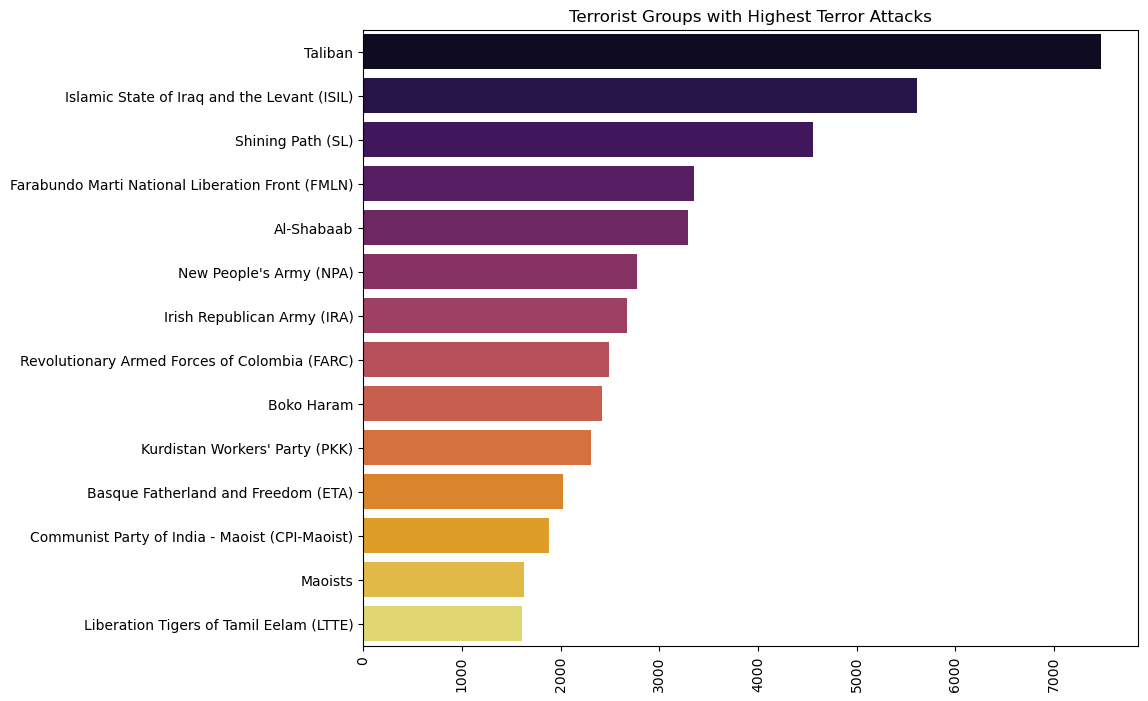

In [70]:
# Terrorist Groups with Highest Terror Attacks
sns.barplot(x=df['gname'].value_counts()[1:15].values, y=df['gname'].value_counts()[1:15].index, palette='inferno')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

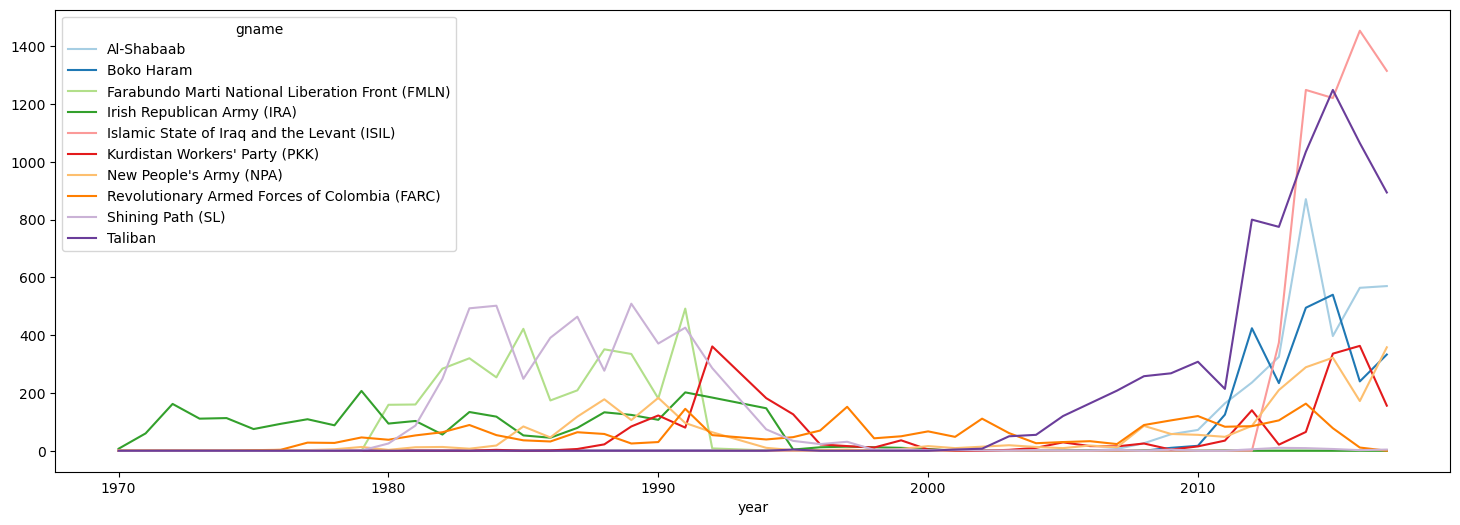

In [71]:
# Activity of Top Terrorist Groups
top_groups10=df[df['gname'].isin(df['gname'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.year,top_groups10.gname).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1960-1970, maybe after the World War 2 due to the mass killing. However, it has probably stopped its activities in the late 90's. Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years.

In [72]:
# Total cases by ISIS
cases_by_isis_df = cases_group_by_count(df[df.gname=='Islamic State of Iraq and the Levant (ISIL)'],"country")

        country  Number of Cases
9          Iraq             4797
19        Syria              594
21       Turkey               82
12      Lebanon               50
15  Philippines               26


In [73]:
# create choropleth map
fig = px.choropleth(cases_by_isis_df, 
                    locations='country',
                    locationmode='country names',
                    color='Number of Cases',
                    hover_name='country',
                    projection='natural earth')

fig.show()

In [74]:
# Total cases by Taliban
cases_by_Taliban_df = cases_group_by_count(df[df.gname=='Taliban'],"country")

        country  Number of Cases
0   Afghanistan             7423
1      Pakistan               54
2  Turkmenistan                1


In [75]:
# create choropleth map
fig = px.choropleth(cases_by_Taliban_df, 
                    locations='country',
                    locationmode='country names',
                    color='Number of Cases',
                    hover_name='country',
                    projection='natural earth')

fig.show()

The basemap clearly shows the regions of activity by the groups. ISIL is looks to be the notorious group in Iran and Iraq or broadly Middle-East. Similarly Taliban is concentrated in Afghanistan and Pakistan.

The Unknown markers, are maybe due to be an individual attack due to any resentment or personal grudges or any non-famous groups.

In [76]:
# Replace the groups had less than 1% of attacks with "Others"
# calculate the percentage of each value in gname
value_counts = df['gname'].value_counts(normalize=True)*100

# create a dictionary to map the values to their replacement values
replacement_dict = {}
for value, percentage in value_counts.items():
    if percentage < 1:
        replacement_dict[value] = "Others"

# replace the values in gname
df['gname'] = df['gname'].apply(lambda x: replacement_dict.get(x, x))

In [77]:
df.gname.value_counts(normalize=True)*100

Unknown                                             45.561971
Others                                              31.957554
Taliban                                              4.115779
Islamic State of Iraq and the Levant (ISIL)          3.089311
Shining Path (SL)                                    2.507004
Farabundo Marti National Liberation Front (FMLN)     1.844340
Al-Shabaab                                           1.809666
New People's Army (NPA)                              1.525667
Irish Republican Army (IRA)                          1.470078
Revolutionary Armed Forces of Colombia (FARC)        1.368807
Boko Haram                                           1.330831
Kurdistan Workers' Party (PKK)                       1.271389
Basque Fatherland and Freedom (ETA)                  1.113979
Communist Party of India - Maoist (CPI-Maoist)       1.033623
Name: gname, dtype: float64

In [78]:
all_atk_group_df = cases_group_by_count(df, "gname")
all_atk_group_df

                                          gname  Number of Cases
13                                      Unknown            82782
9                                        Others            58064
12                                      Taliban             7478
6   Islamic State of Iraq and the Levant (ISIL)             5613
11                            Shining Path (SL)             4555


,gname,Number of Cases
13,Unknown,82782
9,Others,58064
12,Taliban,7478
6,Islamic State of Iraq and the Levant (ISIL),5613
11,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
0,Al-Shabaab,3288
8,New People's Army (NPA),2772
5,Irish Republican Army (IRA),2671
10,Revolutionary Armed Forces of Colombia (FARC),2487


In [79]:
success_rate_group_df = cases_group_by_percentage(df, "gname", "success")
success_rate_group_df

                                               gname    success
4   Farabundo Marti National Liberation Front (FMLN)  98.985377
11                                 Shining Path (SL)  95.214050
3     Communist Party of India - Maoist (CPI-Maoist)  94.462194
7                     Kurdistan Workers' Party (PKK)  94.155844
2                                         Boko Haram  92.928040


,gname,success
4,Farabundo Marti National Liberation Front (FMLN),98.985377
11,Shining Path (SL),95.214050
3,Communist Party of India - Maoist (CPI-Maoist),94.462194
7,Kurdistan Workers' Party (PKK),94.155844
2,Boko Haram,92.928040
10,Revolutionary Armed Forces of Colombia (FARC),92.561319
0,Al-Shabaab,91.727494
9,Others,90.963420
12,Taliban,89.328698
8,New People's Army (NPA),88.636364


In [80]:
success_atk_group_df = cases_group_by_sum(df, "gname", "success")
success_atk_group_df

                                          gname  success
13                                      Unknown    71748
9                                        Others    52817
12                                      Taliban     6680
6   Islamic State of Iraq and the Levant (ISIL)     4759
11                            Shining Path (SL)     4337


,gname,success
13,Unknown,71748
9,Others,52817
12,Taliban,6680
6,Islamic State of Iraq and the Levant (ISIL),4759
11,Shining Path (SL),4337
4,Farabundo Marti National Liberation Front (FMLN),3317
0,Al-Shabaab,3016
8,New People's Army (NPA),2457
10,Revolutionary Armed Forces of Colombia (FARC),2302
5,Irish Republican Army (IRA),2282


In [81]:
# Join the shapefile with your data
group_atk = all_atk_group_df.merge(success_atk_group_df, on='gname', how='left')
group_atk = group_atk[~((group_atk["gname"] == "Unknown") | (group_atk["gname"] == "Others"))]
group_atk["success_rate"] = group_atk["success"] * 100 / group_atk["Number of Cases"]
group_atk

,gname,Number of Cases,success,success_rate
2,Taliban,7478,6680,89.328698
3,Islamic State of Iraq and the Levant (ISIL),5613,4759,84.785320
4,Shining Path (SL),4555,4337,95.214050
5,Farabundo Marti National Liberation Front (FMLN),3351,3317,98.985377
6,Al-Shabaab,3288,3016,91.727494
7,New People's Army (NPA),2772,2457,88.636364
8,Irish Republican Army (IRA),2671,2282,85.436166
9,Revolutionary Armed Forces of Colombia (FARC),2487,2302,92.561319
10,Boko Haram,2418,2247,92.928040
11,Kurdistan Workers' Party (PKK),2310,2175,94.155844


In [82]:
from plotly.subplots import make_subplots

# Create subplots with 1 row and 1 column
fig = make_subplots(rows=1, cols=1)

all_atk = go.Bar(x=group_atk["gname"], y=group_atk["Number of Cases"], name='Total Cases')
success = go.Bar(x=group_atk["gname"], y=group_atk["success"], name='Success')
line_success_rate = go.Scatter(x=group_atk["gname"], y=group_atk["success_rate"], mode='lines', name='Success rate')

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(all_atk)
fig.add_trace(success)
fig.add_trace(line_success_rate, secondary_y=True)

fig.update_layout(barmode='group')
fig.update_xaxes(title_text="Group Name")
fig.update_yaxes(title_text="Number of Cases", secondary_y=False)
fig.update_yaxes(title_text="Success Rate", secondary_y=True, range=[0,100])

fig.show()

### doubter

In [83]:
df.doubtterr.value_counts(normalize=True)*100

 0.0    76.451648
 1.0    15.961803
-9.0     7.586549
Name: doubtterr, dtype: float64

### weapon_type

In [84]:
cases_group_by_weapon_type_df = plot_bar(df,"weapon_type")

   weapon_type  Number of Cases
2   Explosives            92426
4     Firearms            58524
10     Unknown            15157
5   Incendiary            11135
6        Melee             3655


In [85]:
cases_group_by_weapon_type_df.head()

,weapon_type,Number of Cases
2,Explosives,92426
4,Firearms,58524
10,Unknown,15157
5,Incendiary,11135
6,Melee,3655


In [86]:
# Create a pie trace
trace = go.Pie(labels=cases_group_by_weapon_type_df["weapon_type"], values=cases_group_by_weapon_type_df["Number of Cases"])

# Create the layout
layout = go.Layout(title='Pie Chart Weapon type cases')

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the figure
fig.show()

In [87]:
df.head()

,eventid,year,number_of_months,number_of_days,extended,country,region,provstate,city,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack_type,target_type,target_subtype,corp1,target,nationality,gname,guncertain1,individual,nperps,nperpcap,claimed,weapon_type,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,Others,0.0,0,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,Mexico,North America,Federal,Mexico city,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,Others,0.0,0,7.0,NaN,NaN,Unknown,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,4.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,0.0,0,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,Greece,Western Europe,Attica,Athens,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,0.0,0,NaN,NaN,NaN,Explosives,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,0.0,0,NaN,NaN,NaN,Incendiary,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [88]:
# Function to countplot categorical variables
def countplot_bivariate(variable_1,variable_2):
        
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Taliban')
    sns.countplot(x=variable_1,hue=variable_2,data=df[df.gname=='Taliban'],palette='Set1')

    plt.subplot(1,2,2)    
    plt.title('ISIS')
    sns.countplot(x=variable_1,hue=variable_2,data=df[df.gname=='Islamic State of Iraq and the Levant (ISIL)'],palette='Set1')

    plt.show()

### Number of kills, number of wounds

In [89]:
# Number of kills
kill_group_by_df = cases_group_by_sum(df,'year','nkill')

    year    nkill
43  2014  44490.0
44  2015  38853.0
45  2016  34871.0
46  2017  26445.0
42  2013  22273.0


In [90]:
# Number of wounds
wound_group_by_df = cases_group_by_sum(df,'year','nwound')

    year   nwound
44  2015  44043.0
43  2014  41128.0
45  2016  40001.0
42  2013  37688.0
41  2012  25445.0


In [91]:
kill_wound_by_year_df = pd.merge(kill_group_by_df, wound_group_by_df, on = 'year')

In [92]:
kill_wound_by_year_df.head()

,year,nkill,nwound
0,2014,44490.0,41128.0
1,2015,38853.0,44043.0
2,2016,34871.0,40001.0
3,2017,26445.0,24927.0
4,2013,22273.0,37688.0


In [93]:
# Create a line chart using Plotly
kill_wound_by_year_df = kill_wound_by_year_df.sort_values('year', ascending=False)

# Create Scatter traces for extended cases and success cases and suicide cases
kill_cases = go.Scatter(x=kill_wound_by_year_df['year'], y=kill_wound_by_year_df['nkill'], mode='lines', name='Number of Kill')
wound_cases = go.Scatter(x=kill_wound_by_year_df['year'], y=kill_wound_by_year_df['nwound'], mode='lines', name='Number of Wound')

# Add traces to a single Figure object
fig = go.Figure(data=[kill_cases, wound_cases])
fig.update_layout(title='Cases over Time', xaxis_title='Year', yaxis_title='People')
fig.show()

In [94]:
df[df["country"]=="Vietnam"].doubtterr.value_counts()

 0.0    8
-9.0    4
Name: doubtterr, dtype: int64

## Export to CSV file

In [95]:
df.to_csv("terrorism.csv")

## Baghdad Iraq Analysis

### # of cases by cities in Iraq

In [96]:
cases_by_city_df = cases_group_by_count(df[df['country']=='Iraq'],"city")

          city  Number of Cases
445    Baghdad             7585
1016     Mosul             2265
910     Kirkuk              925
469    Baqubah              745
599   Fallujah              579


In [97]:
cases_by_city_df.shape

(1513, 2)

In [98]:
df[df['city']=='Nineveh'].head()

,eventid,year,number_of_months,number_of_days,extended,country,region,provstate,city,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack_type,target_type,target_subtype,corp1,target,nationality,gname,guncertain1,individual,nperps,nperpcap,claimed,weapon_type,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
128539,201403090032,2014,3,9,0,Iraq,Middle East & North Africa,Nineveh,Nineveh,4.0,0,03/09/2014: An explosive device detonated near...,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Police,Police Patrol (including vehicles and convoys),Iraqi Police Service (IPS),Patrol,Iraq,Unknown,0.0,0,-99.0,0.0,0.0,Explosives,Unknown Explosive Type,NaN,0.0,0.0,0.0,4.0,0.0,0.0,0,0.0,"""Iraq: Roundup of Security Incidents 03-10 Mar...",START Primary Collection,-9,-9,0,-9


In [99]:
df[df['city']=='Baghdad'].country.value_counts()

Iraq     7585
Egypt       3
Iran        1
Name: country, dtype: int64

In [100]:
df[df['city']=='Baghdad'].provstate.value_counts()

Baghdad        7586
North Sinai       3
Name: provstate, dtype: int64

In [101]:
# Read the shapefile for the Iraq cities
iraq_cities = gpd.read_file('/kaggle/input/iraq-cities/gadm36_IRQ_shp/gadm36_IRQ_1.shp')
iraq_cities.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IRQ,Iraq,IRQ.1_1,Al-Anbar,Dulaim|Ramadi,None,Muhafazah,Province,None,IQ.AN,"POLYGON ((43.45478 32.58381, 43.45248 32.58043..."
1,IRQ,Iraq,IRQ.2_1,Al-Basrah,Basra|Bassora,None,Muhafazah,Province,None,IQ.BA,"MULTIPOLYGON (((47.96236 30.04431, 47.96236 30..."
2,IRQ,Iraq,IRQ.3_1,Al-Muthannia,Al-Muthanna,None,Muhafazah,Province,None,IQ.MU,"POLYGON ((46.61560 29.16858, 46.55074 29.10584..."
3,IRQ,Iraq,IRQ.4_1,Al-Qadisiyah,Diwaniyah,None,Muhafazah,Province,None,IQ.QA,"POLYGON ((44.66274 31.38137, 44.66124 31.38356..."
4,IRQ,Iraq,IRQ.5_1,An-Najaf,None,None,Muhafazah,Province,None,IQ.NA,"POLYGON ((43.66143 32.08881, 43.66249 32.09125..."


In [102]:
### Top 3 cities 
#       city  Number of Cases
#    Baghdad             7585
#     Mosul             2265
#     Kirkuk              925

In [103]:
# Rename the columns
new_names = {'NAME_1': 'city','VARNAME_1': 'other_name_city'}
iraq_cities = iraq_cities.rename(columns=new_names)

In [104]:
iraq_cities[iraq_cities["other_name_city"].str.contains("Mosul")==True]

,GID_0,NAME_0,GID_1,city,other_name_city,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
15,IRQ,Iraq,IRQ.16_1,Ninawa,Al-Mawsil|Mosul|Ninive|N¡nive|Nineveh|Niniveh,None,Muhafazah,Province,None,IQ.NI,"POLYGON ((42.90537 35.21377, 42.94633 35.14982..."


In [105]:
iraq_cities.loc[iraq_cities["other_name_city"].str.contains("Mosul")==True, "city"] = "Mosul"
iraq_cities.loc[iraq_cities["other_name_city"].str.contains("Kirkuk")==True, "city"] = "Kirkuk"

In [106]:
iraq_cities[iraq_cities["other_name_city"].str.contains("Mosul")==True]

,GID_0,NAME_0,GID_1,city,other_name_city,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
15,IRQ,Iraq,IRQ.16_1,Mosul,Al-Mawsil|Mosul|Ninive|N¡nive|Nineveh|Niniveh,None,Muhafazah,Province,None,IQ.NI,"POLYGON ((42.90537 35.21377, 42.94633 35.14982..."


In [107]:
iraq_cities[iraq_cities["other_name_city"].str.contains("Kirkuk")==True]

,GID_0,NAME_0,GID_1,city,other_name_city,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
7,IRQ,Iraq,IRQ.8_1,Kirkuk,Kirkuk|Tamin,None,Muhafazah,Province,None,IQ.TS,"POLYGON ((44.19487 34.72141, 44.15660 34.75988..."


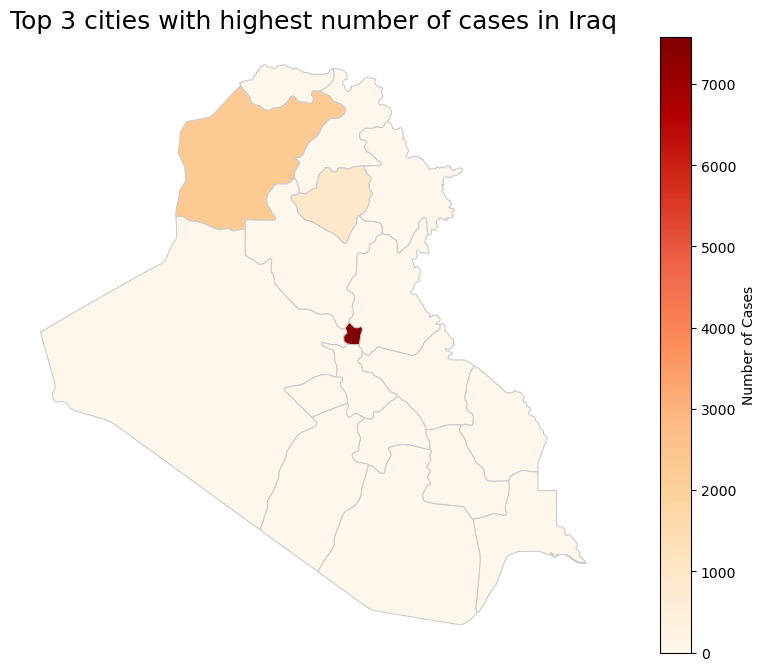

In [108]:
# Join the shapefile with your data
merged = iraq_cities.merge(cases_by_city_df, left_on='city', right_on='city', how='left')

# replace NaN values with 0
merged.fillna(0, inplace=True)

# Define the hover text to show when hovering over a city
merged['hover_text'] = merged['city'] + ': ' + merged['Number of Cases'].astype(str)


# Plot the choropleth map
fig, ax = plt.subplots(figsize=(12, 8))

merged.plot(column='Number of Cases', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
            legend_kwds={'label': 'Number of Cases'})
ax.axis('off')
ax.set_title('Top 3 cities with highest number of cases in Iraq', fontsize=18)

# ax.annotate('', xy=(0.1, 0.1), xycoords='figure fraction', fontsize=10, color='#555555')
# hover_text = mpld3.plugins.PointHTMLTooltip(merged['hover_text'], voffset=10, hoffset=10)
# mpld3.plugins.connect(fig, hover_text)
# mpld3.display()

# merged.plot(column='Number of Cases', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# ax.axis('off')
# plt.title('Number of Cases by City in Iraq', fontsize=18)
plt.show()

In [109]:
baghdad_df = df[(df['country']=='Iraq')&(df['city']=='Baghdad')]

### # of cases by year

In [110]:
# Total cases
cases_by_year_df = cases_group_by_count(baghdad_df,"year")

    year  Number of Cases
29  2015             1000
30  2016              986
28  2014              898
27  2013              639
24  2010              586


In [111]:
# Extended cases (incident extended more than 24 hours)
extended_cases_group_by_df = cases_group_by_sum(baghdad_df,'year','extended')

    year  extended
20  2006        20
18  2004        20
21  2007        14
19  2005        14
29  2015         8


In [112]:
# Success cases
success_cases_group_by_df = cases_group_by_sum(baghdad_df,'year','success')

    year  success
29  2015      952
30  2016      938
28  2014      855
27  2013      616
24  2010      552


In [113]:
# Suicide cases
suicide_cases_group_by_df = cases_group_by_sum(baghdad_df,'year','suicide')

    year  suicide
19  2005       73
28  2014       61
30  2016       53
21  2007       52
20  2006       52


In [114]:
cases_by_year_df = pd.merge(cases_by_year_df, extended_cases_group_by_df, on = 'year', how='left').merge(success_cases_group_by_df, on = 'year').merge(suicide_cases_group_by_df, on = 'year')

In [115]:
cases_by_year_df.head()

,year,Number of Cases,extended,success,suicide
0,2015,1000,8,952,35
1,2016,986,7,938,53
2,2014,898,5,855,61
3,2013,639,1,616,26
4,2010,586,2,552,18


In [116]:
# Create a line chart using Plotly
cases_by_year_df = cases_by_year_df.sort_values('year', ascending=False)

fig = go.Figure(data=go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Number of Cases']))

fig.update_layout(title='Cases over Time', xaxis_title='Year', yaxis_title='Cases')
fig.show()

In [117]:
# Create a line chart using Plotly
cases_by_year_df = cases_by_year_df.sort_values('year', ascending=False)

# Create Scatter traces for extended cases and success cases and suicide cases
total_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['Number of Cases'], mode='lines', name='Total cases')
success_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['success'], mode='lines', name='Success cases')
extended_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['extended'], mode='lines', name='Extended cases')
suicide_cases = go.Scatter(x=cases_by_year_df['year'], y=cases_by_year_df['suicide'], mode='lines', name='Suicide cases')

# Add traces to a single Figure object
fig = go.Figure(data=[total_cases, success_cases, extended_cases, suicide_cases])
fig.update_layout(title='Cases over Time', xaxis_title='Year', yaxis_title='Cases')
fig.show()

### Average number of months terrorism happened each year

In [118]:
avg_months_by_year_df = cases_group_by_avg(baghdad_df, "year", "number_of_months")

    year  number_of_months
0   1976              12.0
7   1991              12.0
17  2003               9.0
6   1989               9.0
27  2013               8.0


In [119]:
# Create a bar chart using Plotly
fig = go.Figure(data=go.Bar(x=avg_months_by_year_df['year'], y=avg_months_by_year_df['number_of_months']))
fig.update_layout(title='Average number of months by Year in Baghdad', xaxis_title='Year', yaxis_title='Average number of months')
fig.show()

### Average number of days per month terrorism happened each year in Baghdad in Iraq

In [120]:
avg_days_by_year_df = cases_group_by_avg(baghdad_df, "year", "number_of_days")

    year  number_of_days
4   1984            26.0
7   1991            26.0
6   1989            23.0
0   1976            20.0
17  2003            19.0


In [121]:
# Create a bar chart using Plotly
fig = go.Figure(data=go.Bar(x=avg_days_by_year_df['year'], y=avg_days_by_year_df['number_of_days']))
fig.update_layout(title='Average number of days per month by Year in Baghdad', xaxis_title='Year', yaxis_title='Average number of days per month')
fig.show()

In [122]:
baghdad_df.head()

,eventid,year,number_of_months,number_of_days,extended,country,region,provstate,city,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack_type,target_type,target_subtype,corp1,target,nationality,gname,guncertain1,individual,nperps,nperpcap,claimed,weapon_type,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
4385,197612150001,1976,12,15,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Airports & Aircraft,Airport,NaN,Airport terminal,Iraq,Unknown,0.0,0,NaN,NaN,NaN,Explosives,Dynamite/TNT,Explosive - 8 kg TNT,10.0,NaN,NaN,285.0,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,0,-9
4402,197612240001,1976,12,24,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,Popular Front for the Liberation of Palestine ...,Personnel,West Bank and Gaza Strip,Unknown,0.0,0,NaN,NaN,NaN,Firearms,Automatic or Semi-Automatic Rifle,Automatic firearm,2.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
10109,198001280004,1980,1,28,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Middle east airlines,Middle east,Multinational,Others,0.0,0,1.0,NaN,NaN,Melee,Knife or Other Sharp Object,Knife,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
10588,198004010019,1980,4,1,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Private Citizens & Property,Student,NaN,Student Meeting,Iraq,Others,0.0,0,2.0,NaN,NaN,Explosives,Unknown Explosive Type,Explosive; Grenade; Pistol,3.0,NaN,1.0,7.0,NaN,NaN,1,0.0,NaN,PGIS,1,1,0,1
11252,198006190004,1980,6,19,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",NaN,Embassy (British),Great Britain,Unknown,0.0,0,4.0,NaN,NaN,Firearms,Unknown Gun Type,Firearm; Grenades,3.0,NaN,3.0,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


### Attack types

In [123]:
plot_bar(baghdad_df,"attack_type")

                   attack_type  Number of Cases
2            Bombing/Explosion             6313
0                Armed Assault              729
1                Assassination              366
6  Hostage Taking (Kidnapping)              133
8                      Unknown               23


,attack_type,Number of Cases
2,Bombing/Explosion,6313
0,Armed Assault,729
1,Assassination,366
6,Hostage Taking (Kidnapping),133
8,Unknown,23
3,Facility/Infrastructure Attack,14
5,Hostage Taking (Barricade Incident),4
7,Unarmed Assault,2
4,Hijacking,1


### target_type

In [124]:
plot_bar(baghdad_df,"target_type")

                    target_type  Number of Cases
11  Private Citizens & Property             3295
1                      Business             1157
5          Government (General)              905
10                       Police              692
7                      Military              371


,target_type,Number of Cases
11,Private Citizens & Property,3295
1,Business,1157
5,Government (General),905
10,Police,692
7,Military,371
16,Transportation,262
12,Religious Figures/Institutions,238
17,Unknown,179
14,Terrorists/Non-State Militia,120
2,Educational Institution,91


### nationality

In [125]:
cases_per_nationality = plot_bar(baghdad_df,"nationality")
cases_per_nationality.head()

      nationality  Number of Cases
15           Iraq             7313
39  United States               96
14           Iran               34
23  Multinational               16
13  International               16


,nationality,Number of Cases
15,Iraq,7313
39,United States,96
14,Iran,34
23,Multinational,16
13,International,16


### gname

In [126]:
cases_per_group = plot_bar(baghdad_df,"gname")
cases_per_group.head()

                                         gname  Number of Cases
2                                      Unknown             6531
0  Islamic State of Iraq and the Levant (ISIL)              622
1                                       Others              432


,gname,Number of Cases
2,Unknown,6531
0,Islamic State of Iraq and the Levant (ISIL),622
1,Others,432


### weapon_type

In [127]:
cases_group_by_weapon_type_df = plot_bar(baghdad_df,"weapon_type")

  weapon_type  Number of Cases
0  Explosives             6450
1    Firearms             1068
4     Unknown               43
3       Melee               13
2  Incendiary               11


In [128]:
cases_group_by_weapon_type_df.head()

,weapon_type,Number of Cases
0,Explosives,6450
1,Firearms,1068
4,Unknown,43
3,Melee,13
2,Incendiary,11


In [129]:
# Create a pie trace
trace = go.Pie(labels=cases_group_by_weapon_type_df["weapon_type"], values=cases_group_by_weapon_type_df["Number of Cases"])

# Create the layout
layout = go.Layout(title='Pie Chart Weapon type cases')

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Display the figure
fig.show()

In [130]:
baghdad_df.head()

,eventid,year,number_of_months,number_of_days,extended,country,region,provstate,city,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attack_type,target_type,target_subtype,corp1,target,nationality,gname,guncertain1,individual,nperps,nperpcap,claimed,weapon_type,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
4385,197612150001,1976,12,15,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Airports & Aircraft,Airport,NaN,Airport terminal,Iraq,Unknown,0.0,0,NaN,NaN,NaN,Explosives,Dynamite/TNT,Explosive - 8 kg TNT,10.0,NaN,NaN,285.0,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,0,-9
4402,197612240001,1976,12,24,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Assassination,Violent Political Party,Party Official/Candidate/Other Personnel,Popular Front for the Liberation of Palestine ...,Personnel,West Bank and Gaza Strip,Unknown,0.0,0,NaN,NaN,NaN,Firearms,Automatic or Semi-Automatic Rifle,Automatic firearm,2.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
10109,198001280004,1980,1,28,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,Hijacking,Airports & Aircraft,Aircraft (not at an airport),Middle east airlines,Middle east,Multinational,Others,0.0,0,1.0,NaN,NaN,Melee,Knife or Other Sharp Object,Knife,0.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
10588,198004010019,1980,4,1,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Private Citizens & Property,Student,NaN,Student Meeting,Iraq,Others,0.0,0,2.0,NaN,NaN,Explosives,Unknown Explosive Type,Explosive; Grenade; Pistol,3.0,NaN,1.0,7.0,NaN,NaN,1,0.0,NaN,PGIS,1,1,0,1
11252,198006190004,1980,6,19,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,1.0,0,NaN,1,1,1,0.0,0.0,1,0,Bombing/Explosion,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",NaN,Embassy (British),Great Britain,Unknown,0.0,0,4.0,NaN,NaN,Firearms,Unknown Gun Type,Firearm; Grenades,3.0,NaN,3.0,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


### Number of kills, number of wounds

In [131]:
# Number of kills
kill_group_by_df = cases_group_by_sum(baghdad_df,'year','nkill')

    year   nkill
20  2006  2824.0
28  2014  2507.0
21  2007  2483.0
30  2016  2076.0
27  2013  1975.0


In [132]:
# Number of wounds
wound_group_by_df = cases_group_by_sum(baghdad_df,'year','nwound')

    year  nwound
28  2014  6897.0
29  2015  6049.0
20  2006  5590.0
30  2016  5461.0
27  2013  5436.0


In [133]:
kill_wound_by_year_df = pd.merge(kill_group_by_df, wound_group_by_df, on = 'year')

In [134]:
kill_wound_by_year_df.head()

,year,nkill,nwound
0,2006,2824.0,5590.0
1,2014,2507.0,6897.0
2,2007,2483.0,4991.0
3,2016,2076.0,5461.0
4,2013,1975.0,5436.0


In [135]:
# Create a line chart using Plotly
kill_wound_by_year_df = kill_wound_by_year_df.sort_values('year', ascending=False)

# Create Scatter traces for extended cases and success cases and suicide cases
kill_cases = go.Scatter(x=kill_wound_by_year_df['year'], y=kill_wound_by_year_df['nkill'], mode='lines', name='Number of Kill')
wound_cases = go.Scatter(x=kill_wound_by_year_df['year'], y=kill_wound_by_year_df['nwound'], mode='lines', name='Number of Wound')

# Add traces to a single Figure object
fig = go.Figure(data=[kill_cases, wound_cases])
fig.update_layout(title='Cases over Time', xaxis_title='Year', yaxis_title='People')
fig.show()